<h1>Dota 2 total kills analysis

Bet365 gives 5/6 odds for the total kills of any given game to be above or below 50.5. Let's have a look at recent pro games to see whether this is an accurate splitting point.

Load in the matches from a csv file from datdota.com

In [1]:
import pandas as pd
import re
import scipy.stats
import math

In [2]:
#Load the file
df = pd.read_csv('Matches.csv')

#We are just interested in the games IDs and the kill scores
df = df[['Match ID', 'Kills Score']]
df.head()

,Match ID,Kills Score
0,5718100700,31-41
1,5718045399,12-19
2,5717987182,23-3
3,5717905633,23-11
4,5717842177,23-5


We need total score rather than each teams score and so will add them together.

In [3]:
i=0
for score in df['Kills Score']:
    score_list = score.split('-')
    df.iloc[i,1] = int(score_list[0]) + int(score_list[1])
    i+=1
    
df.head()

,Match ID,Kills Score
0,5718100700,72
1,5718045399,31
2,5717987182,26
3,5717905633,34
4,5717842177,28


Let's group the scores together into easily viewable categories and take a look at what we have.

<AxesSubplot:>

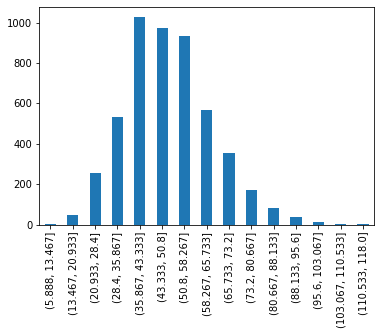

In [4]:
categories = pd.cut(df['Kills Score'], 15)

categories.value_counts(sort=False).plot.bar()

52.5 does seem to be near the average but let's delve a litle deeper.

In [5]:
low_scores_proportion = df[df['Kills Score'] < 50.5].size/df.size
print('The mean value is ' + str(df['Kills Score'].mean()) + '.')
print('The standard deviation is ' + str(df['Kills Score'].std()) + '.')
print(str(low_scores_proportion*100) + '% of the scores are below 52.5.')
expected_return = (low_scores_proportion*(5/6)) - (1 - low_scores_proportion)
print('Betting on the lower total score will give an expected return of £' + str(expected_return) + ' per £1 bet.')

The mean value is 49.33.
The standard deviation is 14.61033169912551.
56.68% of the scores are below 52.5.
Betting on the lower total score will give an expected return of £0.0391333333333333 per £1 bet.


To have a positive expected return we require the low scoring games to make up over 6/11s of the games. Let's test the hypothesis that the proportion is more than this. So we assume that that in reality 6/11 games will have total scores higher than 50.5 and find the chances that our observed proportion is what we'll get.

In [6]:
#Set the variables of our binomial distribution based on this hypothesis X~B(6/11, n)
p = 6/11
q = 1 - p
n = df.size

#Approximate this as a normal distribution X~N(pn, pqn)
mean = p*n
var = p*q*n

#P(X > low_scores_proportion*n) = P(Z > (low_scores*n - mean)/std)
result = scipy.stats.norm(0, 1).cdf(((low_scores_proportion*n)-mean)/math.sqrt(var))
print('The chance that our observed number of low scoring games is more than the needed proportion is ' + str(result*100) + '%.')

The chance that our observed number of low scoring games is more than the needed proportion is 99.99909384403406%.


We get such a high confidence since n is so massive.